In [1]:
# Import necessary libraries 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Import SQLAlchemy modules for ORM 
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create a connection to the SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect the database into new SQLAlchemy model
Base = automap_base()
# Reflect the tables from the database
Base.prepare(autoload_with=engine)

In [6]:
# Print all table names in the database
Base.classes.keys()

['measurement', 'station']

In [7]:
# Map each table to a class for ORM
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session to link Python to the database
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [10]:
# Calculate the date one year ago from the most recent date
a_year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query for the last 12 months of precipitation data
date_prcp_scores = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= a_year_before).all()

# Store the query results in a DataFrame and set column names
scores_df = pd.DataFrame(date_prcp_scores, columns = ['date', 'precipitation'])

# Sort the DataFrame by date
scores_df =scores_df.sort_values('date')

# Display the first few rows of the DataFrame
scores_df.head()


,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


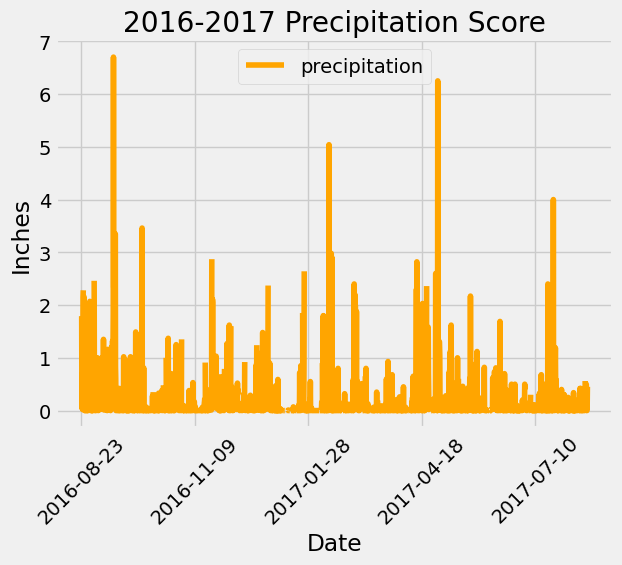

In [11]:
# Plot the precipitation data using Matplotlib
scores_df.plot(x='date', y='precipitation', color="orange", rot=45)
plt.title("2016-2017 Precipitation Score")
plt.xlabel("Date")
plt.ylabel("Inches")
grid=True

In [12]:
# Compute summary statistics for the precipitation data
scores_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [14]:
# Query to find the most active stations (highest number of measurements)
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Calculate the lowest, highest, and average temperature for the most active station
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
              filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [16]:
# Query the last 12 months of temperature data for the most active station
temp_obs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= a_year_before).all()
# Store the query results in a DataFrame
temp_obs_df = pd.DataFrame(temp_obs, columns=['tobs'])
# Display the last few rows of the DataFrame
temp_obs_df.tail()

,tobs
347,77.0
348,77.0
349,76.0
350,76.0
351,79.0


Text(0.5, 0, 'Temperature')

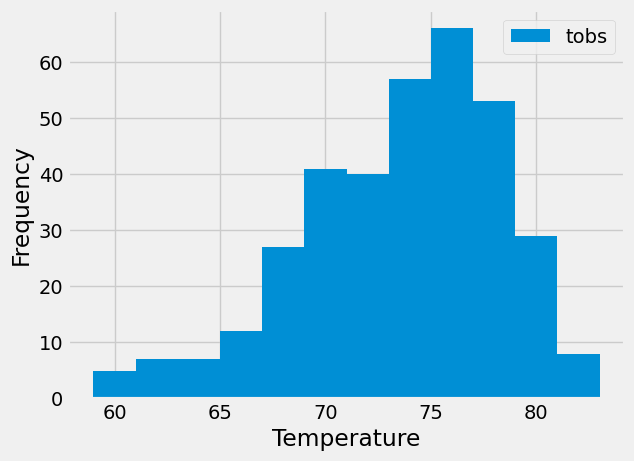

In [17]:
# Plot the temperature observations as a histogram
temp_obs_df.plot.hist(bins=12)
plt.xlabel("Temperature")

# Close Session

In [18]:
# Close the session to end the connection
session.close()